## This code is to find out the different of each epoch and batch size combination

In [31]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Path_FashionMNIST

In [32]:
'''find the Model path'''
# find the current path
current_path = os.getcwd()
print('The current path is:', current_path)

# find the parent path
parent_path = Path(current_path).parent
print('The parent path is:', parent_path)

# find the data path
data_path1 = parent_path / 'Data/vgg11/fashion_mnist/'
data_path2 = parent_path / 'Data/vgg11/cifar100/'
print('The data path is:', data_path1)
print('The data path is:', data_path2)

The current path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/code
The parent path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090
The data path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/vgg11/fashion_mnist
The data path is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/vgg11/cifar100


### extract data

In [33]:
batch_sizes = [256]
epochs = [20]
rounds = 1

#### read all the data from all the folders

In [34]:
folder_list = []
for epoch in epochs:
    for batch in batch_sizes:
        for round in range(rounds):
            folder_name = 'E' + str(epoch) + '_B' + str(batch) + '_R' + str(round)
            # print('The folder name is:', folder_name)
            folder_list.append(folder_name)
            
# find the folders in the data path
folder1_names = os.listdir(data_path1)
folder2_names = os.listdir(data_path2)
print('The folder names are:', folder1_names, folder2_names)
print('The folder list is:', folder_list)

# find the common folders
common1_folders = list(set(folder_list).intersection(folder1_names))
common2_folders = list(set(folder_list).intersection(folder2_names))
# sort the common folders
common1_folders.sort()
common2_folders.sort()
print('The common folders are:', common1_folders, common2_folders)
# print(len(common_folders))

The folder names are: ['E20_B256_R0'] ['E20_B256_R0']
The folder list is: ['E20_B256_R0']
The common folders are: ['E20_B256_R0'] ['E20_B256_R0']


### analysis data

#### find the data in same epoch and batch size

In [35]:
# read the data from the common folders
data_f = data_path1 / common1_folders[0]
data_c = data_path2 / common2_folders[0]
print('The data folder is:', data_f, data_c)
# find the files in the data folder
files_f = os.listdir(data_f)
files_c = os.listdir(data_c)
print('The files are:', files_f,'\n', files_c)


The data folder is: /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/vgg11/fashion_mnist/E20_B256_R0 /Users/dtjgp/Learning/GreenAI/Cloud/4090/Data/vgg11/cifar100/E20_B256_R0
The files are: ['Train_time.npy', 'Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Train_acc.npy', 'Test_acc.npy'] 
 ['Train_time.npy', 'Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Train_acc.npy', 'Test_acc.npy']


In [36]:
# read all the files in the common folders
LayersTime_f = np.load(data_f / 'Layers_time.npy', allow_pickle=True)
TrainPartTime_f = np.load(data_f / 'Train_part_time.npy', allow_pickle=True)
EpochTime_f = np.load(data_f / 'Epoch_time.npy', allow_pickle=True)
EpochEnergy_f = np.load(data_f / 'Epoch_energy.npy', allow_pickle=True)
TrainAcc_f = np.load(data_f / 'Train_acc.npy', allow_pickle=True)
TestAcc_f = np.load(data_f / 'Test_acc.npy', allow_pickle=True)

LayersTime_c = np.load(data_c / 'Layers_time.npy', allow_pickle=True)
TrainPartTime_c = np.load(data_c / 'Train_part_time.npy', allow_pickle=True)
EpochTime_c = np.load(data_c / 'Epoch_time.npy', allow_pickle=True)
EpochEnergy_c = np.load(data_c / 'Epoch_energy.npy', allow_pickle=True)
TrainAcc_c = np.load(data_c / 'Train_acc.npy', allow_pickle=True)
TestAcc_c = np.load(data_c/ 'Test_acc.npy', allow_pickle=True)

#### LayersTime

In [37]:
LayersName = ['S0_C0', 'S0_R1', 'S0_M2', 'S1_C0', 'S1_R1', 'S1_M2', 'S2_C0', 'S2_R1', 'S2_C2', 'S2_R3', 'S2_M4', 'S3_C0', 'S3_R1', 'S3_C2', 'S3_R3', 'S3_M4', 'S4_C0', 'S4_R1', 'S4_C2', 'S4_R3', 'S4_M4', 'F5', 'L6', 'R7', 'D8', 'L9', 'R10', 'D11', 'L12']
print(f'The lenth of the LayersName is {len(LayersName)}')

The lenth of the LayersName is 29


##### fashionMNIST

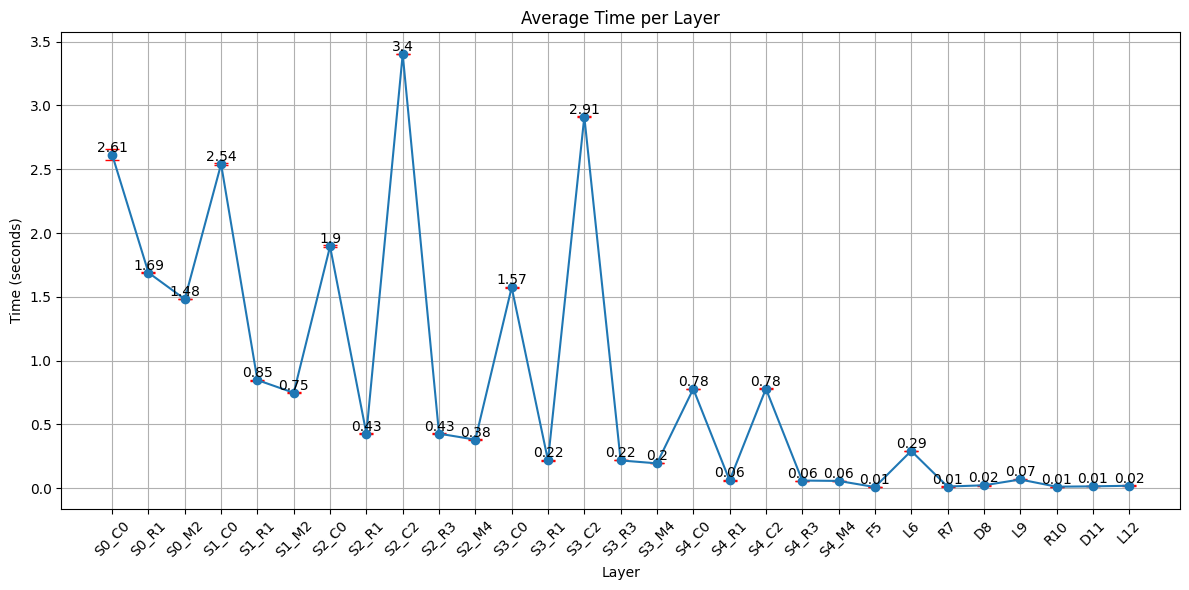

In [38]:
# Calculate the mean and standard deviation for each layer
layer_means = np.mean(LayersTime_f, axis=1)
layer_stds = np.std(LayersTime_f, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(LayersName, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(LayersName)):
    plt.text(i, layer_means[i], np.round(layer_means[i], 2), ha='center', va='bottom')
plt.show()

In [39]:
IncepBlock = []
IncepBlockIndex = []
for i in LayersName:
    if 'C' in i:
        IncepBlock.append(i)
        IncepBlockIndex.append(LayersName.index(i))
IncepBlock = IncepBlock
IncepBlockIndex = IncepBlockIndex
print(f'The inception blocks are {IncepBlock}')
print(f'The inception block indexes are {IncepBlockIndex}')

The inception blocks are ['S0_C0', 'S1_C0', 'S2_C0', 'S2_C2', 'S3_C0', 'S3_C2', 'S4_C0', 'S4_C2']
The inception block indexes are [0, 3, 6, 8, 11, 13, 16, 18]


In [40]:
IncepNum = len(IncepBlock)
IncepTime = np.zeros((IncepNum, epochs[0]))
for i in range(IncepNum):
    IncepTime[i,:] = LayersTime_f[IncepBlockIndex[i], :]
print(f'The inception time is {IncepTime}')

The inception time is [[2.80666089 2.60433793 2.61619687 2.60371041 2.60877609 2.60359383
  2.60318232 2.60431337 2.60367155 2.60440946 2.60587215 2.60431576
  2.6034801  2.60424495 2.60428786 2.60348034 2.60361052 2.60412693
  2.60365748 2.60346103]
 [2.57886505 2.54073071 2.53682375 2.53689504 2.53656507 2.54166341
  2.53568268 2.53692627 2.53661513 2.53623295 2.53776836 2.53709769
  2.53705597 2.53763843 2.53667045 2.53622222 2.53613591 2.5360055
  2.53598785 2.54789019]
 [1.91477394 1.91427875 1.89189124 1.89190292 1.89184475 1.89176583
  1.89065123 1.90467405 1.89173961 1.89391494 1.89310265 1.89235616
  1.89192057 1.89241838 1.90025735 1.89101434 1.89100385 1.89153409
  1.89146781 1.89061594]
 [3.40741849 3.39911723 3.40197802 3.40278149 3.40175247 3.40166593
  3.39963531 3.40086889 3.40183783 3.4004488  3.40213323 3.40193176
  3.40288377 3.40165663 3.40067744 3.39980578 3.39971781 3.40032578
  3.40030122 3.40162587]
 [1.57317376 1.58267498 1.57241702 1.57162309 1.57178998 1.5717

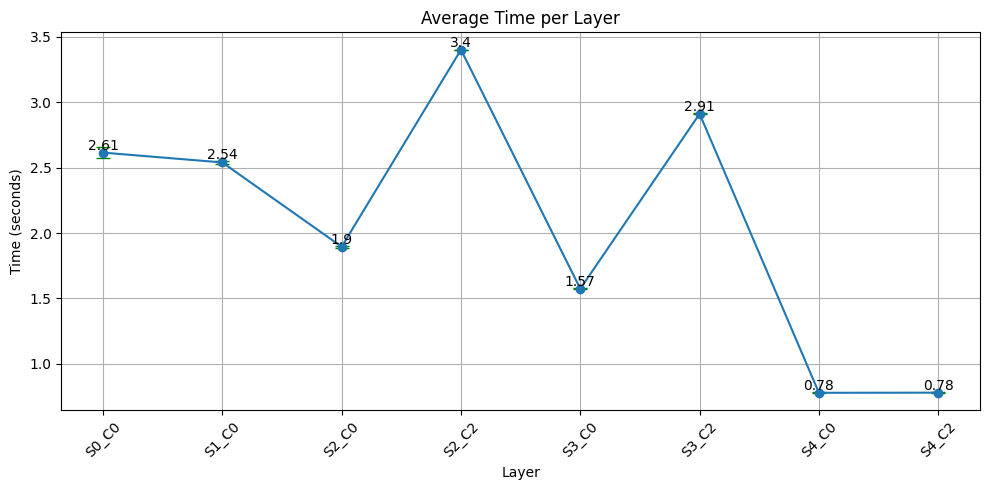

In [41]:
# Calculate the mean and standard deviation for each layer
inceplayer_means = np.mean(IncepTime, axis=1)
inceplayer_stds = np.std(IncepTime, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(IncepBlock, inceplayer_means, yerr=inceplayer_stds, fmt='-o', ecolor='g', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(IncepBlock)):
    plt.text(i, inceplayer_means[i], np.round(inceplayer_means[i], 2), ha='center', va='bottom')
plt.show()

##### cifar100

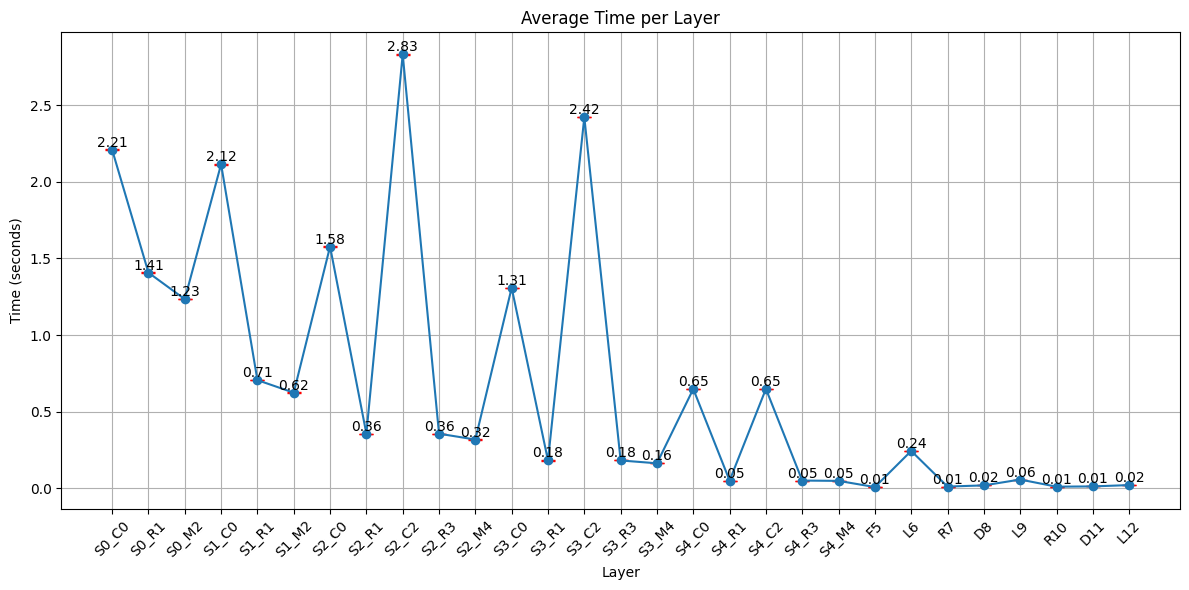

In [42]:
# Calculate the mean and standard deviation for each layer
layer_means = np.mean(LayersTime_c, axis=1)
layer_stds = np.std(LayersTime_c, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(LayersName, layer_means, yerr=layer_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(LayersName)):
    plt.text(i, layer_means[i], np.round(layer_means[i], 2), ha='center', va='bottom')
plt.show()

In [43]:
IncepBlock = []
IncepBlockIndex = []
for i in LayersName:
    if 'C' in i:
        IncepBlock.append(i)
        IncepBlockIndex.append(LayersName.index(i))
IncepBlock = IncepBlock
IncepBlockIndex = IncepBlockIndex
print(f'The inception blocks are {IncepBlock}')
print(f'The inception block indexes are {IncepBlockIndex}')

The inception blocks are ['S0_C0', 'S1_C0', 'S2_C0', 'S2_C2', 'S3_C0', 'S3_C2', 'S4_C0', 'S4_C2']
The inception block indexes are [0, 3, 6, 8, 11, 13, 16, 18]


In [44]:
IncepNum = len(IncepBlock)
IncepTime = np.zeros((IncepNum, epochs[0]))
for i in range(IncepNum):
    IncepTime[i,:] = LayersTime_c[IncepBlockIndex[i], :]
print(f'The inception time is {IncepTime}')

The inception time is [[2.21802592 2.2103014  2.20977783 2.2078712  2.20865226 2.21709895
  2.20869231 2.20942473 2.20839047 2.2086432  2.20826483 2.20810819
  2.22218943 2.20761251 2.20692372 2.20727229 2.20734191 2.20799804
  2.20772004 2.20771527]
 [2.12163782 2.11477613 2.11449432 2.11409974 2.11413193 2.11573768
  2.12721705 2.11479211 2.11452866 2.11534572 2.11469412 2.11398768
  2.11508656 2.11346483 2.1129868  2.1128943  2.11362529 2.11327934
  2.11248136 2.11253858]
 [1.57909703 1.57657743 1.57601571 1.58266091 1.57580638 1.57619023
  1.57616901 1.57691073 1.57669592 1.59063292 1.57692099 1.57586002
  1.57743573 1.57557344 1.57465291 1.57521224 1.57546091 1.57514429
  1.58516979 1.5743525 ]
 [2.8325026  2.83961892 2.83118463 2.8304491  2.83019805 2.83162093
  2.83024883 2.83112526 2.83054638 2.83433199 2.83132029 2.83073473
  2.83160496 2.83070135 2.83296323 2.83578181 2.83045673 2.83846307
  2.82966375 2.82950163]
 [1.31085134 1.30843186 1.30912089 1.3082037  1.30816817 1.308

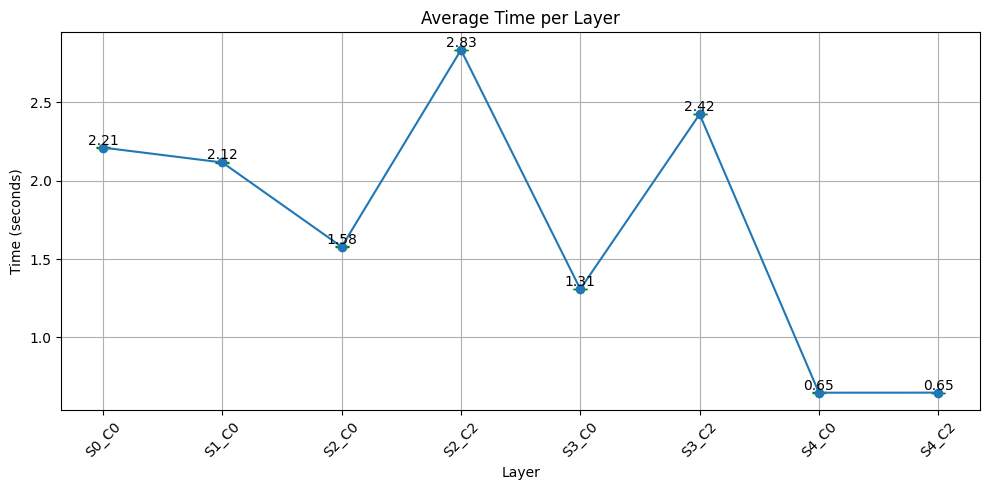

In [45]:
# Calculate the mean and standard deviation for each layer
inceplayer_means = np.mean(IncepTime, axis=1)
inceplayer_stds = np.std(IncepTime, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(IncepBlock, inceplayer_means, yerr=inceplayer_stds, fmt='-o', ecolor='g', capsize=5)
plt.title('Average Time per Layer')
plt.xlabel('Layer')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(IncepBlock)):
    plt.text(i, inceplayer_means[i], np.round(inceplayer_means[i], 2), ha='center', va='bottom')
plt.show()

#### TrainPartTime

In [46]:
TrainPartName = ['TimeToDevice', 'Forward', 'Backward', 'Test']

##### fashionMNIST

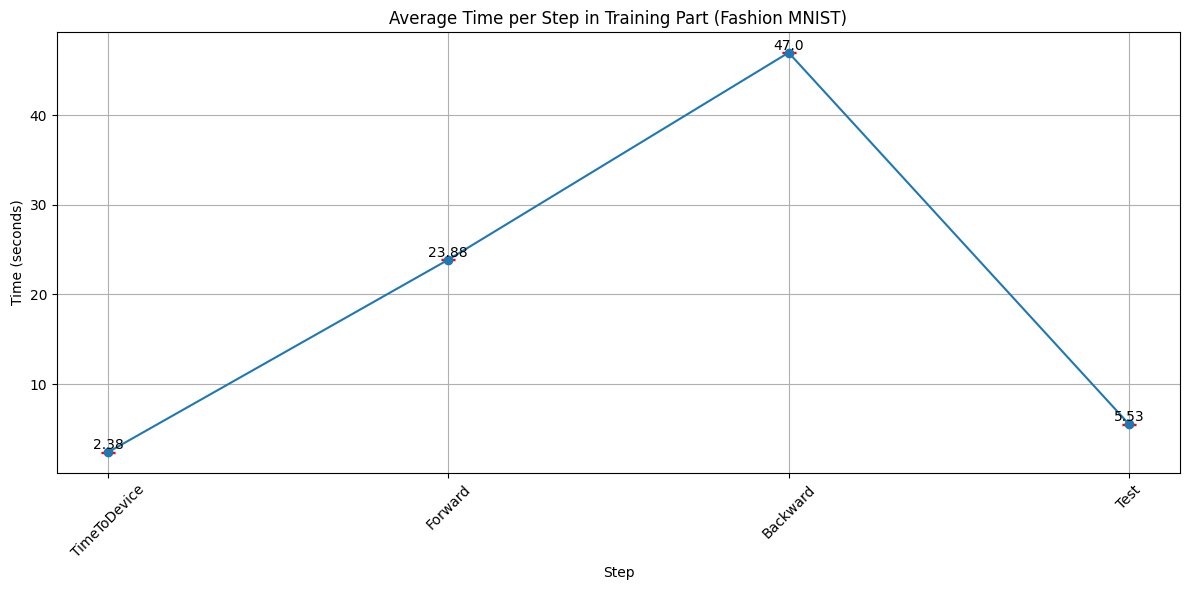

In [47]:
# Calculate the mean and standard deviation for each layer
trainpart_means = np.mean(TrainPartTime_f, axis=1)
trainpart_stds = np.std(TrainPartTime_f, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, trainpart_means, yerr=trainpart_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Step in Training Part (Fashion MNIST)') 
plt.xlabel('Step')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, trainpart_means[i], np.round(trainpart_means[i], 2), ha='center', va='bottom')
plt.show()

##### cifar100

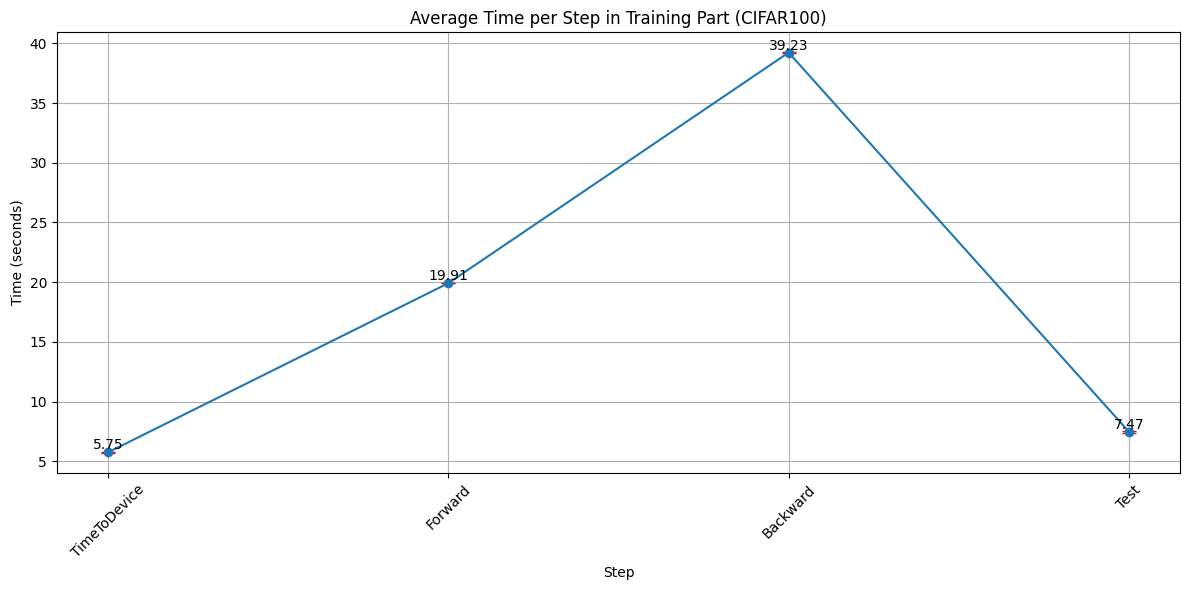

In [48]:
# Calculate the mean and standard deviation for each layer
trainpart_means = np.mean(TrainPartTime_c, axis=1)
trainpart_stds = np.std(TrainPartTime_c, axis=1)

# Plot the average time per layer with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, trainpart_means, yerr=trainpart_stds, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Time per Step in Training Part (CIFAR100)')
plt.xlabel('Step')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, trainpart_means[i], np.round(trainpart_means[i], 2), ha='center', va='bottom')
plt.show()

#### EpochEnergy

##### fashionMNIST

In [49]:
totalEpochEnergy_f = np.zeros((1, epochs[0]))
avgEpochEnergy_f = np.zeros((1, epochs[0]))
print('The total energy is:', totalEpochEnergy_f.shape, avgEpochEnergy_f.shape)

The total energy is: (1, 20) (1, 20)


In [50]:
for i in range(EpochEnergy_f.shape[0]):
    Energy_epoch = EpochEnergy_f[i][0]
    # print(Energy_epoch)
    totalEnergy_epoch_f = np.sum(Energy_epoch)
    avgEpochEnergy_epoch_f = np.mean(Energy_epoch)
    totalEnergy_epoch_f = np.round(totalEnergy_epoch_f, 2)
    avgEpochEnergy_epoch_f = np.round(avgEpochEnergy_epoch_f, 2)
    totalEpochEnergy_f[0,i] = totalEnergy_epoch_f
    avgEpochEnergy_f[0,i] = avgEpochEnergy_epoch_f
print(f'The total energy per epoch is: {totalEpochEnergy_f}')
print(f'The average energy per epoch is: {avgEpochEnergy_f}')

The total energy per epoch is: [[26083.38 27133.27 27317.72 27427.23 27399.4  27329.74 27084.3  27301.53
  27361.27 27346.26 27238.27 27405.42 27374.24 27333.29 27300.37 27339.72
  27400.83 27363.91 27416.31 27330.51]]
The average energy per epoch is: [[306.86 323.02 325.21 326.51 326.18 325.35 326.32 325.02 325.73 325.55
  324.27 326.26 325.88 325.4  325.   325.47 326.2  325.76 326.38 325.36]]


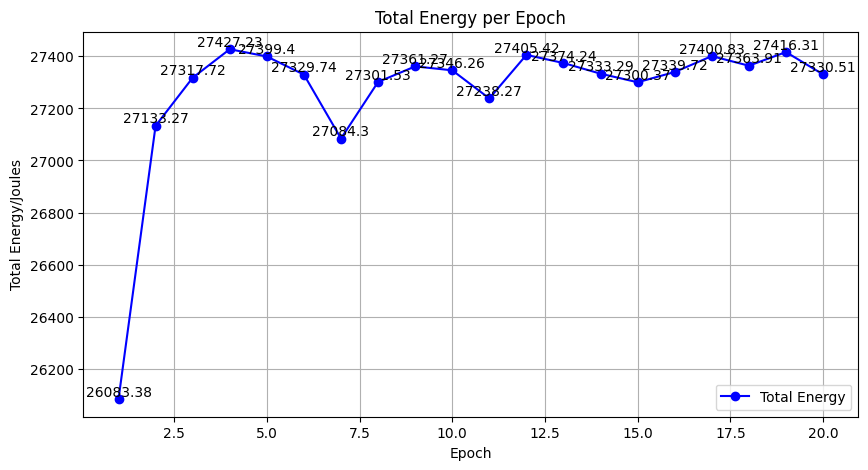

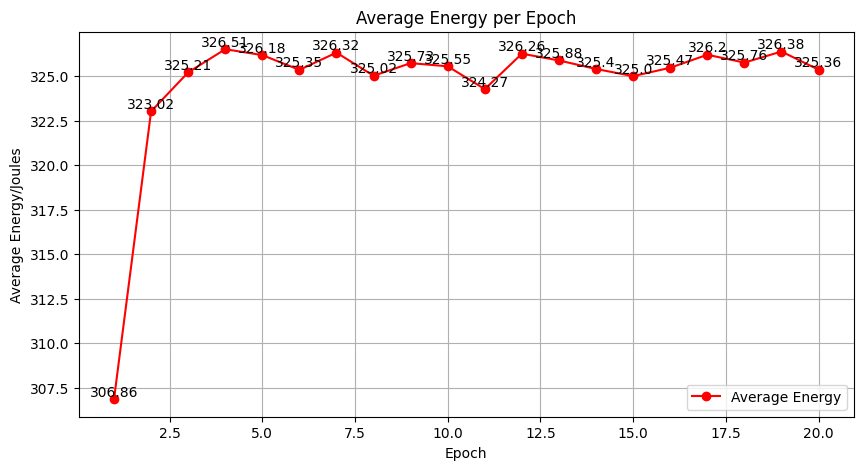

In [51]:
epoch_list = np.arange(1, epochs[0]+1)

# Plotting the total energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, totalEpochEnergy_f.reshape(-1,), marker='o', linestyle='-', color='b', label='Total Energy')
plt.title('Total Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Total Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], totalEpochEnergy_f[0,i], totalEpochEnergy_f[0,i], ha='center', va='bottom')
plt.show()

# Plotting the average energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, avgEpochEnergy_f.reshape(-1,), marker='o', linestyle='-', color='r', label='Average Energy')
plt.title('Average Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], avgEpochEnergy_f[0,i], avgEpochEnergy_f[0,i], ha='center', va='bottom')
plt.show()

In [52]:
# print(len(epoch_list), len(avgEpochEnergy_f.reshape(-1,)))
AvgTotalEnergyEpoch = np.mean(totalEpochEnergy_f.reshape(-1,))
StdEnergyEpoch = np.std(totalEpochEnergy_f.reshape(-1,))
print(f'The average energy per epoch is: {AvgTotalEnergyEpoch}, the standard deviation is: {StdEnergyEpoch}')

The average energy per epoch is: 27264.3485, the standard deviation is: 284.0830246648855


In [53]:
# print(len(epoch_list), len(avgEpochEnergy_f.reshape(-1,)))
AvgEnergyEpoch = np.mean(avgEpochEnergy_f.reshape(-1,))
StdEnergyEpoch = np.std(avgEpochEnergy_f.reshape(-1,))
print(f'The average energy per epoch is: {AvgEnergyEpoch}, the standard deviation is: {StdEnergyEpoch}')

The average energy per epoch is: 324.5865, the standard deviation is: 4.143096999829956


##### cifar100 

In [54]:
totalEpochEnergy_c = np.zeros((1, epochs[0]))
avgEpochEnergy_c = np.zeros((1, epochs[0]))
print('The total energy is:', totalEpochEnergy_c.shape, avgEpochEnergy_c.shape)

The total energy is: (1, 20) (1, 20)


In [55]:
for i in range(EpochEnergy_c.shape[0]):
    Energy_epoch = EpochEnergy_c[i][0]
    # print(Energy_epoch)
    totalEnergy_epoch_c = np.sum(Energy_epoch)
    avgEpochEnergy_epoch_c = np.mean(Energy_epoch)
    totalEnergy_epoch_c = np.round(totalEnergy_epoch_c, 2)
    avgEpochEnergy_epoch_c = np.round(avgEpochEnergy_epoch_c, 2)
    totalEpochEnergy_c[0,i] = totalEnergy_epoch_c
    avgEpochEnergy_c[0,i] = avgEpochEnergy_epoch_c
print(f'The total energy per epoch is: {totalEpochEnergy_c}')
print(f'The average energy per epoch is: {avgEpochEnergy_c}')

The total energy per epoch is: [[23270.56 23921.16 23720.17 23715.28 23790.42 23794.08 23805.31 23928.23
  23969.16 24018.77 24031.6  24053.32 23987.8  23929.2  23880.35 24056.64
  23814.25 23820.55 23849.29 23850.86]]
The average energy per epoch is: [[287.29 291.72 292.84 292.78 293.71 293.75 293.89 295.41 295.92 296.53
  296.69 296.95 296.15 295.42 294.82 293.37 294.   294.08 294.44 294.46]]


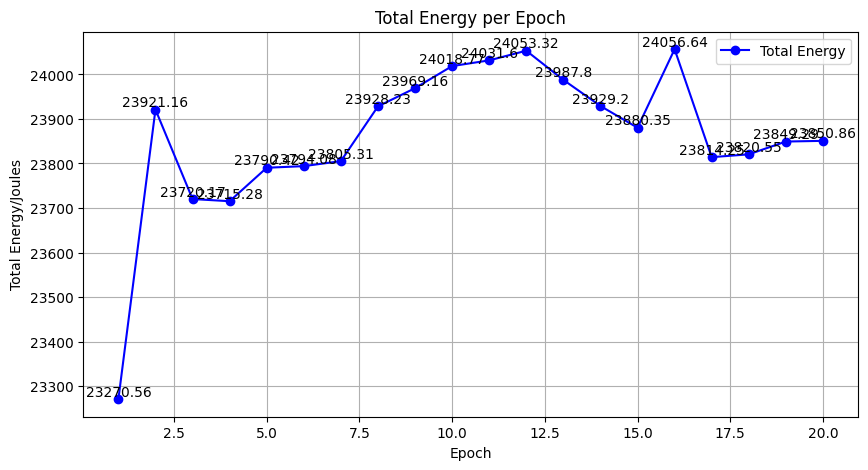

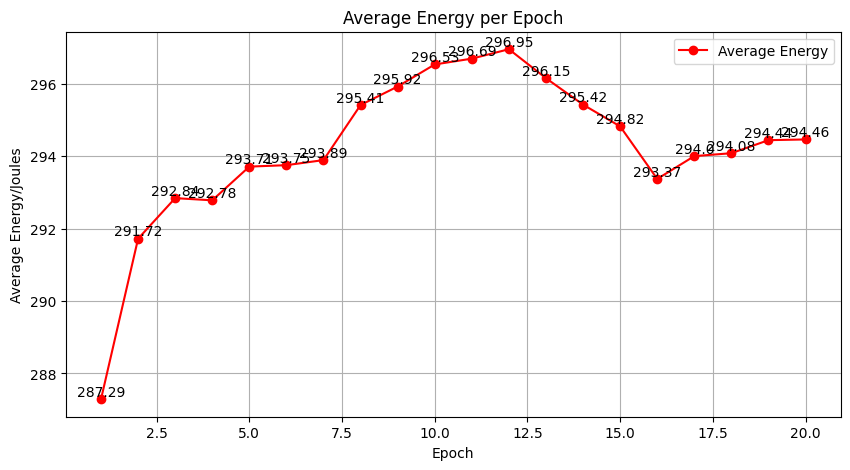

In [56]:
epoch_list = np.arange(1, epochs[0]+1)

# Plotting the total energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, totalEpochEnergy_c.reshape(-1,), marker='o', linestyle='-', color='b', label='Total Energy')
plt.title('Total Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Total Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], totalEpochEnergy_c[0,i], np.round(totalEpochEnergy_c[0,i], 2), ha='center', va='bottom')
plt.show()

# Plotting the average energy per epoch
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, avgEpochEnergy_c.reshape(-1,), marker='o', linestyle='-', color='r', label='Average Energy')
plt.title('Average Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], avgEpochEnergy_c[0,i], np.round(avgEpochEnergy_c[0,i], 2), ha='center', va='bottom')
plt.show()

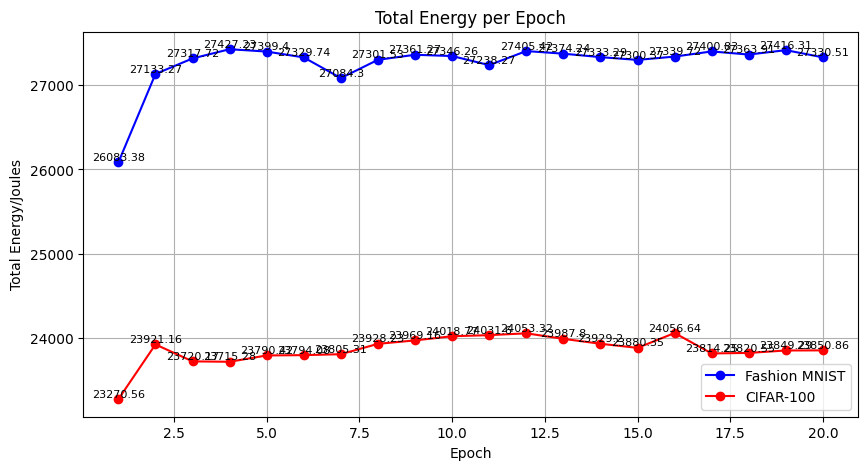

In [57]:
# plot total energy per epoch of two datasets
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, totalEpochEnergy_f.reshape(-1,), marker='o', linestyle='-', color='b', label='Fashion MNIST')
plt.plot(epoch_list, totalEpochEnergy_c.reshape(-1,), marker='o', linestyle='-', color='r', label='CIFAR-100')
plt.title('Total Energy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Total Energy/Joules')
plt.grid(True)
plt.legend()
# plot the value on each point, with smaller font size
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], totalEpochEnergy_f[0,i], np.round(totalEpochEnergy_f[0,i], 2), ha='center', va='bottom', fontsize=8)
    plt.text(epoch_list[i], totalEpochEnergy_c[0,i], np.round(totalEpochEnergy_c[0,i], 2), ha='center', va='bottom', fontsize=8)
plt.show()

#### EpochTime

##### fashionMNIST

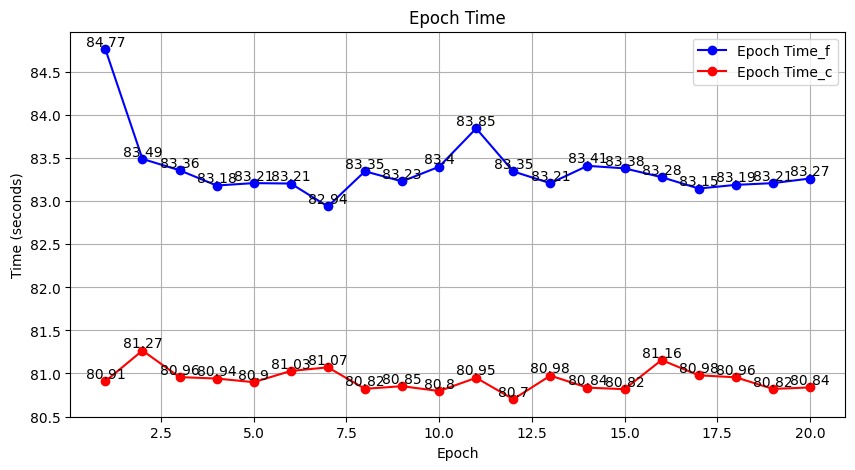

In [58]:
# plot the EpochTime_f and EpochTime_c
epoch_list = np.arange(1, epochs[0]+1)
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, EpochTime_f.reshape(-1,), marker='o', linestyle='-', color='b', label='Epoch Time_f')
plt.plot(epoch_list, EpochTime_c.reshape(-1,), marker='o', linestyle='-', color='r', label='Epoch Time_c')
plt.title('Epoch Time')
plt.xlabel('Epoch')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()
# plot the value on each point
for i in range(len(epoch_list)):
    plt.text(epoch_list[i], EpochTime_f[i], np.round(EpochTime_f[i], 2), ha='center', va='bottom')
    plt.text(epoch_list[i], EpochTime_c[i], np.round(EpochTime_c[i], 2), ha='center', va='bottom')
plt.show()

In [59]:
EpochTime_f

array([84.76756072, 83.49286079, 83.36113191, 83.18399096, 83.21182275,
       83.20675421, 82.94031572, 83.34918547, 83.23187327, 83.40197563,
       83.84716964, 83.34721804, 83.21017241, 83.41257763, 83.38344884,
       83.28085756, 83.14894438, 83.19132185, 83.21154857, 83.26505065])

##### cifar100

In [60]:
EpochTime_c

array([80.90915203, 81.26658392, 80.95775414, 80.9413712 , 80.89894319,
       81.02909017, 81.07111216, 80.82185054, 80.85232401, 80.79585361,
       80.94963598, 80.70080781, 80.97504854, 80.83545804, 80.81737328,
       81.15584898, 80.97870755, 80.95543122, 80.82041788, 80.83768463])

#### average energy consumption per step

##### fashionmnist

In [61]:
# calculate the average energy consumption per step in each epoch, and get the round value
EnergyConsumpStep_f = np.round(TrainPartTime_f * avgEpochEnergy_f, 2)
print(f'The shape of the EnergyConsumpStep_f is {EnergyConsumpStep_f.shape}')

The shape of the EnergyConsumpStep_f is (4, 20)


In [62]:
# calculate the mean and standard deviation for each step energy consumption
EnergyConsumpStepMean_f = np.mean(EnergyConsumpStep_f, axis=1)
EnergyConsumpStepStd_f = np.std(EnergyConsumpStep_f, axis=1)

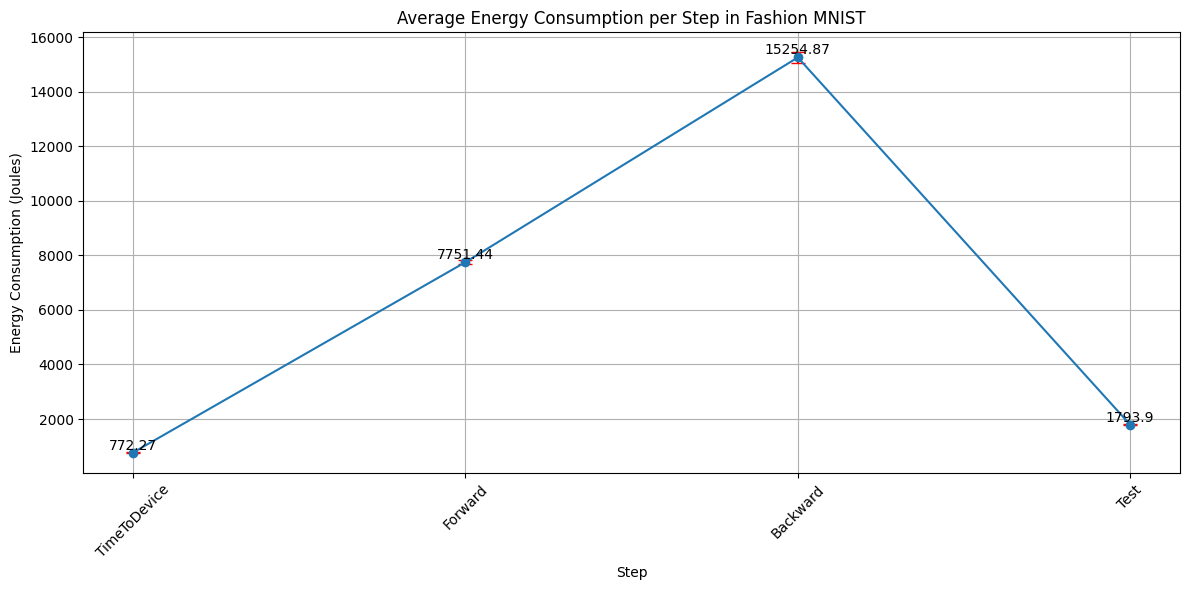

In [63]:
# plot the average energy consumption per step with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, EnergyConsumpStepMean_f, yerr=EnergyConsumpStepStd_f, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Energy Consumption per Step in Fashion MNIST')
plt.xlabel('Step')
plt.ylabel('Energy Consumption (Joules)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, EnergyConsumpStepMean_f[i], np.round(EnergyConsumpStepMean_f[i], 2), ha='center', va='bottom')
plt.show()

##### cifar100

In [64]:
EnergyConsumpStep_c = np.round(TrainPartTime_c * avgEpochEnergy_c, 2)

In [65]:
# calculate the mean and standard deviation for each step energy consumption
EnergyConsumpStepMean_c = np.mean(EnergyConsumpStep_c, axis=1)
EnergyConsumpStepStd_c = np.std(EnergyConsumpStep_c, axis=1)

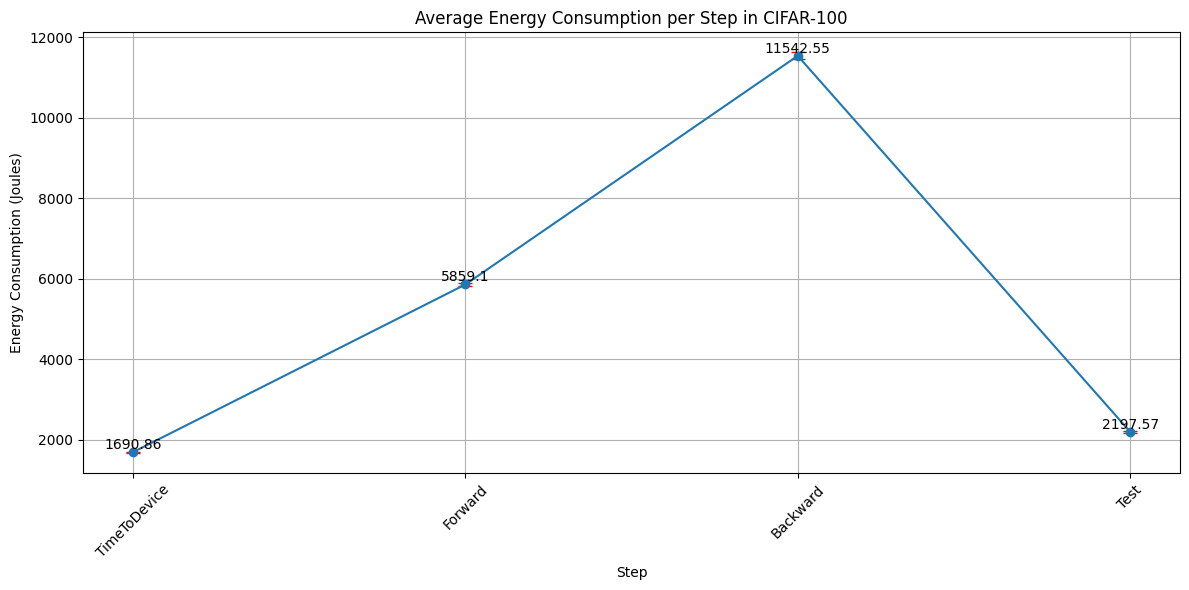

In [66]:
# plot the average energy consumption per step with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(TrainPartName, EnergyConsumpStepMean_c, yerr=EnergyConsumpStepStd_c, fmt='-o', ecolor='r', capsize=5)
plt.title('Average Energy Consumption per Step in CIFAR-100')
plt.xlabel('Step')
plt.ylabel('Energy Consumption (Joules)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# add the value on each point in the plot
for i in range(len(TrainPartName)):
    plt.text(i, EnergyConsumpStepMean_c[i], np.round(EnergyConsumpStepMean_c[i], 2), ha='center', va='bottom')
plt.show()